# Basic linear regreshion model (Y = AX + B)<br>

In [1]:
import pandas as pd
import numpy as np
import sklearn as sklb

Load the dataset

In [2]:
df = pd.read_csv('USA_Housing.csv')
df.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."


## Split to - X(Train), Y(Test) 
Create an X array that contains the features to train on, and a y array with the target variable - the Price column.
While we remove any non valuable data

In [3]:
FEATURE_COLUMNS = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']
LABEL_COLUMN = ['Price']

In [4]:
x = df[FEATURE_COLUMNS]
y = df[LABEL_COLUMN] # Can also give it another column to prredict 

Use sklearn.model_selection.train_test_split to split the data (train/test) <br>
We split the data to 70% and 30% , run the model on 70% data, and then test on the 30% and see if the results are close to the real values. 

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Create the Model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

## Train the Model<br>
We send it the X and the Y and it findes the A , B (from Y = AX + B).

In [8]:
model.fit(x_train, y_train)

LinearRegression()

## Information about the Model

Display the model coefficient/weiht. (The A from Y = AX + B).<br><br>
If one of the coefs is really small we can delete his feature from the dataset, and retrain the model.<br>
But, first have to check that this column doesn't have big numbers (like a salary), and than it's fine that it's coef is small.

In [9]:
model.coef_

array([[2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
        1.52165814e+01]])

Display the model intercept/bias (The B from Y = AX + B).<br>
The minimum value of every y (In this exmple, the minimum cose of every house).

In [10]:
model.intercept_

array([-2638673.42619028])

## Test the Model

Predict the test set, and than check it to decide if the model is good

In [11]:
predictions = model.predict(x_test)

Score - a math mathod <br>
A precent of 100

In [12]:
model.score(x_test, y_test) # Score - a math mathod

0.914681849875402

### Loss function
**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
The following function shows us the error rate.<br>
It called **loss function**, because we want to minimize it.<br><br>
Why the mean square of the sum of the pow?<br>
Because if we got:<br>
y_test => 1,000,000 | predicted => 1,000,000 | t_test-predicted =>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0 (Perfect Model)<br>
y_test => 1,500,000 | predicted => 1,600,000 | t_test-predicted => -100,000<br>
y_test => 3,100,000 | predicted => 3,000,000 | t_test-predicted => &nbsp;100,000<br>
Mean: 0 (sum/n)<br>
RMSE: 50,000 (square(sum(pow)/n)) - The right answer.

In [13]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

100341.52954485411

**Scatter Graph**<br>
Use scatter graph with the test and the predictions.<br>
We want to see a perfect thin line.

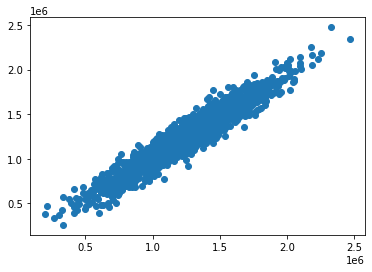

In [14]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)

**Residual Histogram**<br>
Create distplot with 50 bins for the error (real value - predicted).<br>
We want to see one long column exculy on the zero.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


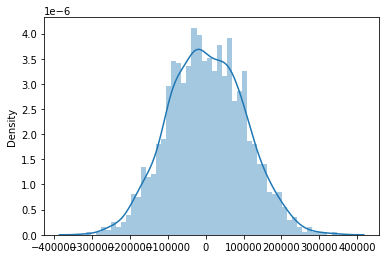

In [15]:
import seaborn as sb
sb.distplot(y_test-predictions,bins=50)

# TensorFlow Linear Regrassion
The TensorFlow model we are going to use requires that the data we pass it comes in as a ```tf.data.Dataset``` object. This means we must create a *input function* that can convert our current pandas dataframe into that object. 

In [16]:
%tensorflow_version 2.x
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [17]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use
  
train_input_fn = make_input_fn(x_train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(x_test, y_test, num_epochs=1, shuffle=False)

linear estimator = The Tensor Flow linear regression algorithm.

In [24]:
feature_columns = []
for feature_name in FEATURE_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float64))

In [25]:
feature_columns

[NumericColumn(key='Avg. Area Income', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Avg. Area House Age', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Avg. Area Number of Rooms', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Avg. Area Number of Bedrooms', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Area Population', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None)]

In [ ]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)

In [ ]:
linear_est.train(train_input_fn)

In [ ]:
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

In [34]:
print(result)  # the result variable is simply a dict of stats about our model

{'average_loss': 123598275000.0, 'label/mean': 1241064.0, 'loss': 123677660000.0, 'prediction/mean': 1004027.75, 'global_step': 1100}
